## Preprocessing

In [3]:
# import packages
import pandas as pd
import numpy as np

In [4]:
# load the data to dataframe
df = pd.read_excel("data/gtd_70to94_0617dist.xlsx",header=0)
my_df = df[df["iyear"] == 2016].copy()
my_df.to_csv("data/user-test-data.csv", index=False)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        df[cat] = le.fit_transform(df[cat].astype(str))
        '''
        output = X.copy() 
        if self.columns is not None:
            for col in self.columns:
                #output[col] = LabelEncoder().fit_transform(output[col])
                output[col] = LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                #output[colname] = LabelEncoder().fit_transform(col)
                output[colname] = LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
input_terrorist_group = df[['country_txt','location','attacktype1_txt','weaptype1_txt','targtype1_txt','gname']]

In [9]:
input_terrorist_group.head()

,country_txt,location,attacktype1_txt,weaptype1_txt,targtype1_txt,gname
0,Dominican Republic,NaN,Assassination,Unknown,Private Citizens & Property,MANO-D
1,Mexico,NaN,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League
2,Philippines,NaN,Assassination,Unknown,Journalists & Media,Unknown
3,Greece,NaN,Bombing/Explosion,Explosives/Bombs/Dynamite,Government (Diplomatic),Unknown
4,Japan,NaN,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Unknown


In [10]:
input_terrorist_group.shape

(58099, 6)

In [11]:
encoded = MultiColumnLabelEncoder(columns = ['country_txt','location','attacktype1_txt','weaptype1_txt','targtype1_txt']).fit_transform(input_terrorist_group)
encoded_terrorist_group = encoded[['country_txt','location','attacktype1_txt','weaptype1_txt','targtype1_txt','gname']]

In [12]:
encoded_terrorist_group.head()

,country_txt,location,attacktype1_txt,weaptype1_txt,targtype1_txt,gname
0,45,545,1,10,13,MANO-D
1,105,545,6,10,5,23rd of September Communist League
2,128,545,1,10,7,Unknown
3,63,545,2,2,5,Unknown
4,83,545,3,5,5,Unknown


## Model

In [13]:
dataset = encoded_terrorist_group.values
dataset

array([[45, 545, 1, 10, 13, 'MANO-D'],
       [105, 545, 6, 10, 5, '23rd of September Communist League'],
       [128, 545, 1, 10, 7, 'Unknown'],
       ...,
       [116, 545, 0, 4, 2, 'Recontras'],
       [33, 545, 6, 10, 6, 'Unknown'],
       [170, 398, 0, 4, 0, 'Anti-Abortion extremists']], dtype=object)

In [14]:
X = dataset[:,0:5].astype(float)
y = dataset[:,5]

In [15]:
dataset.shape

(58099, 6)

In [16]:
print(dataset)

[[45 545 1 10 13 'MANO-D']
 [105 545 6 10 5 '23rd of September Communist League']
 [128 545 1 10 7 'Unknown']
 ...
 [116 545 0 4 2 'Recontras']
 [33 545 6 10 6 'Unknown']
 [170 398 0 4 0 'Anti-Abortion extremists']]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(classification_report(y_test,rfc_pred))

                                                                                           precision    recall  f1-score   support

                                                                                    1 May       0.00      0.00      0.00         3
                                    16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00        11
                                                                         1st of May Group       0.00      0.00      0.00         0
                                                                            2 April Group       0.00      0.00      0.00         2
                                                              20 December Movement (M-20)       0.00      0.00      0.00         4
                                                       23rd of September Communist League       0.31      1.00      0.48         5
                                                             28 May Armenian Organ

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(encoded_terrorist_group.columns[:5])
features

['country_txt',
 'location',
 'attacktype1_txt',
 'weaptype1_txt',
 'targtype1_txt']

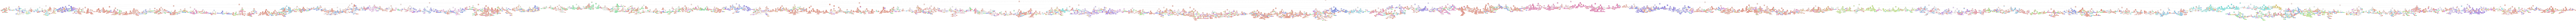

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())